# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train,y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Visualizing unique signs

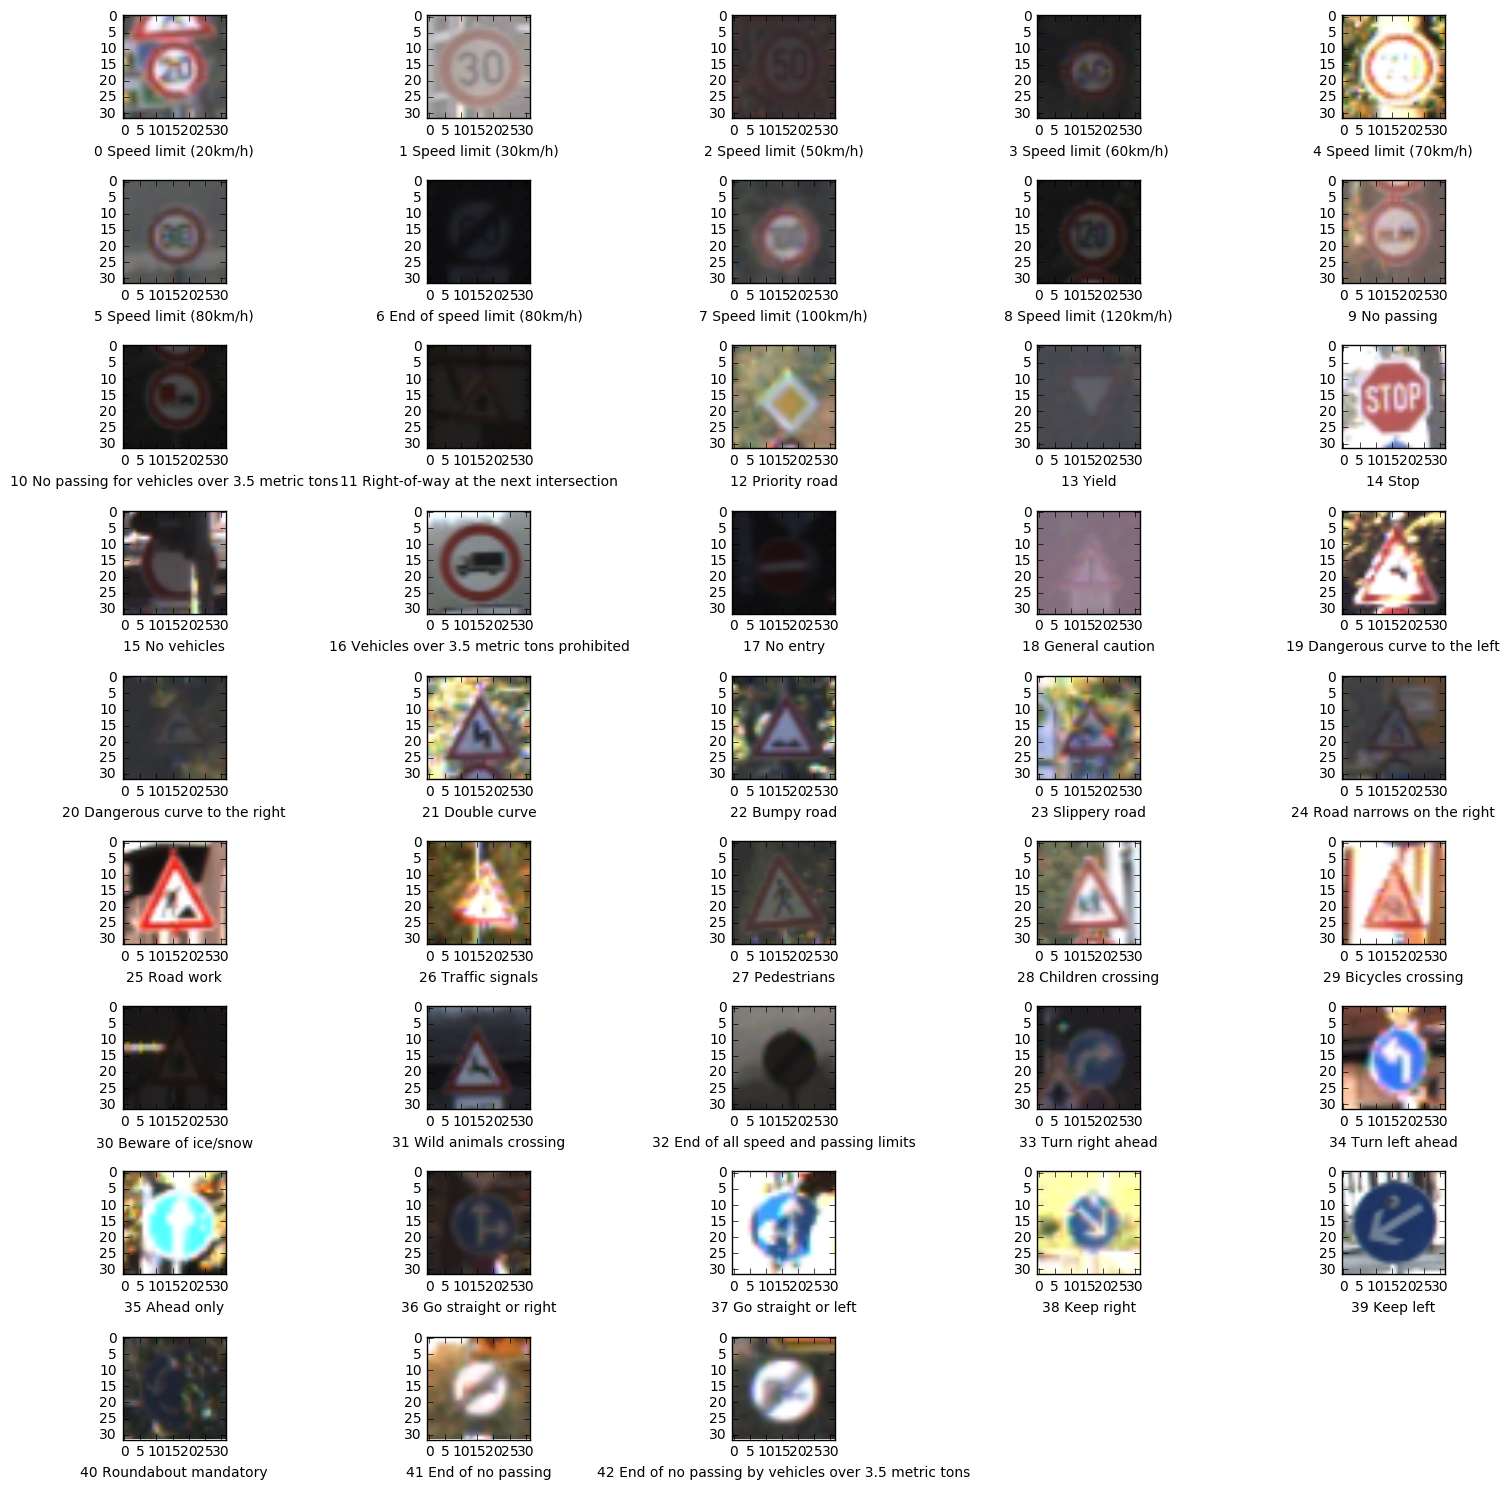

In [4]:
# getting indices and counts of unique labels from train set
y_train_u, index_train_u, count_train_u = np.unique(y_train, return_index=True, return_counts=True)

# getting counts of unique labels from test set
y_test_u, count_test_u = np.unique(y_test, return_counts=True)

# reading name of traffic signs from 'signnames.csv' file
SignsName = pd.read_csv('signnames.csv', header=0)

# drawing signs (with number and labels) from train set with unique labels
f, ax = plt.subplots(nrows=9, ncols=5, figsize=(15,15))
k, j = 0, 0
for i in index_train_u:
    image = X_train[i]
    ax[k,j].imshow(image)
    ax[k,j].set_xlabel(str(y_train[i])+' '+SignsName.loc[SignsName.index[y_train[i]],'SignName'])
    ax[8,3].axis('off') 
    ax[8,4].axis('off')
    j += 1
    if j%5 == 0:
        j = 0
        k +=1
f.tight_layout()

### Visualizing count of each sign

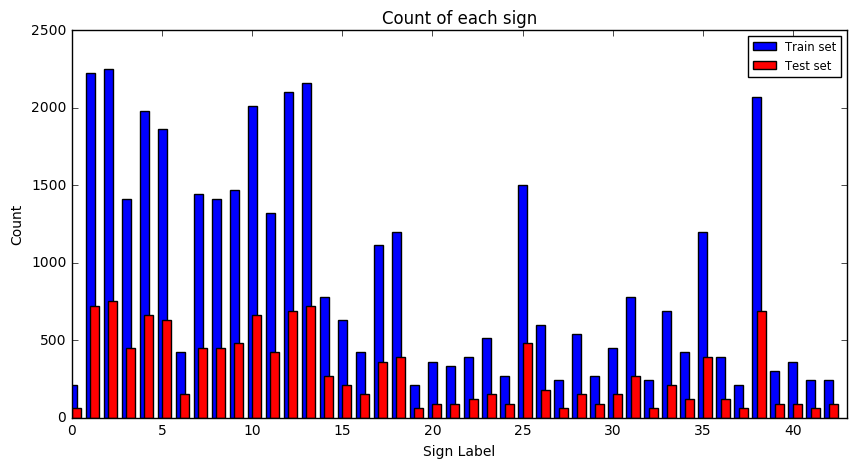

In [5]:
# visualizing count of each sign in train and test sets
train_u = pd.DataFrame({'Label': y_train_u, 'Count': count_train_u})
test_u = pd.DataFrame({'Label': y_test_u, 'Count': count_test_u})
f, ax = plt.subplots(figsize=(10,5))
ax.bar(train_u['Label'], train_u['Count'], width=0.5, align='center')
ax.bar(test_u['Label'], test_u['Count'], width=0.5, color='r')
ax.set_title('Count of each sign')
ax.set_xlabel('Sign Label')
ax.set_ylabel('Count')
ax.set_xlim([0, 43])
ax.legend(['Train set', 'Test set'], fontsize='small')

In [6]:
# getting some statistics about train and test sets
print('Train set:\n{0}\nTest set:\n{1}'.format(train_u.describe(), test_u.describe()))

Train set:
             Count      Label
count    43.000000  43.000000
mean    911.837209  21.000000
std     695.856715  12.556539
min     210.000000   0.000000
25%     345.000000  10.500000
50%     600.000000  21.000000
75%    1425.000000  31.500000
max    2250.000000  42.000000
Test set:
            Count      Label
count   43.000000  43.000000
mean   293.720930  21.000000
std    233.442389  12.556539
min     60.000000   0.000000
25%     90.000000  10.500000
50%    180.000000  21.000000
75%    450.000000  31.500000
max    750.000000  42.000000


Counts of signs are very different: 
train set: 210 - 2250
test set: 60 - 750
For Neural Network it may mean overfitting on dominating type of signs. 

Later, in section 'Test model', we will check test accuracy on signs with smallest count in test test.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Preprocessing data

In [7]:
# normalizing train set data. Input data is in [0, 256]. After normalization data is in [-1, 1].
X_train_norm = X_train/128-1

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Approach for preprocessing depends on input data range, data volume, what kind of features are important and so on.
In this case input data is in range[0, 256] with 3 color channels. My assumption is that the color is important, because traffic signs have a few colors and we can use this fact.
For preprocessing I chose only normalization. It is widespread technique with plusses:
* all input variables will be in small range [-1,1]. It's important if variables have different ranges
* weights are unlikely to be very big, so there is no need for regularization

Also, according to statistics, we have dominating signs (see fig. Count of each sign), so it would be reasonable to equal counts, for example, by generating new signs, but it's optional.

We can change pictures by using, for example, scipy module and generate additional data for signs with small count, but it should be used when we have a problem to recognize these signs by our model. 

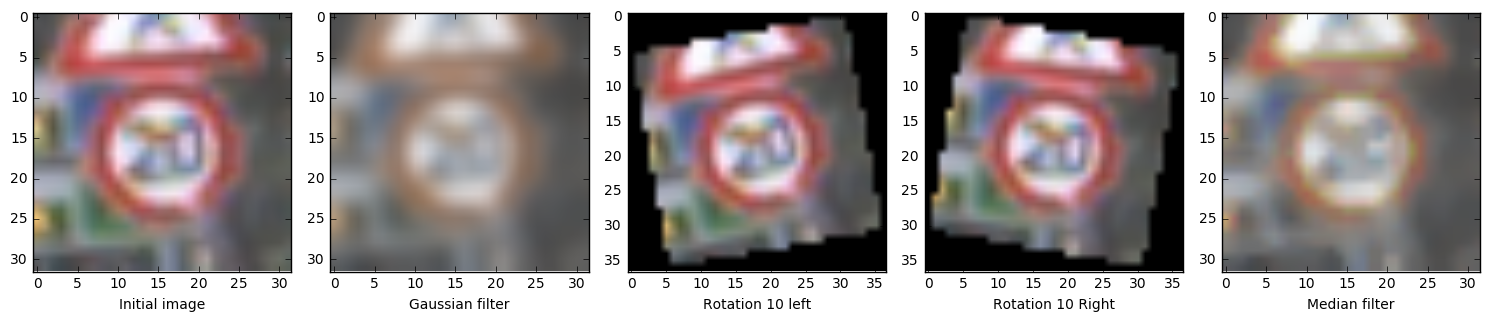

In [8]:
# example of transforming images
from scipy import ndimage

image = X_train[0]
f, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# Initial image
ax[0].imshow(image)
ax[0].set_xlabel('Initial image')
# Gaussian filter
ax[1].imshow(ndimage.gaussian_filter(image, sigma=1, mode='nearest'))
ax[1].set_xlabel('Gaussian filter')
# Rotation left
ax[2].imshow(ndimage.rotate(image, 10))
ax[2].set_xlabel('Rotation 10 left')
# Rotation right
ax[3].imshow(ndimage.rotate(image, -10))
ax[3].set_xlabel('Rotation 10 Right')
# Median filter
ax[4].imshow(ndimage.median_filter(image, 3))
ax[4].set_xlabel('Median filter')

f.tight_layout()

In [9]:
# importing function for dividing train set into train and validation sets
from sklearn.cross_validation import train_test_split

# spliting train set into train (80%) and validation (20%) sets by using stratified approach
X_train_norm, X_valid_norm, y_train, y_valid = train_test_split(X_train_norm, y_train,
                                                      test_size=0.20,
                                                      random_state=5,
                                                      stratify=y_train)

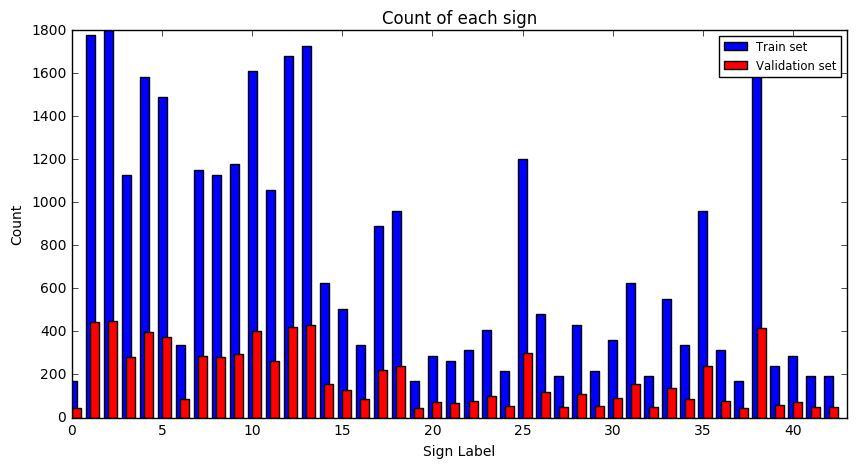

In [10]:
# drawing some statistics
y_train_u, count_train1_u = np.unique(y_train, return_counts=True)
y_valid_u, count_valid_u = np.unique(y_valid, return_counts=True)
train1_u = pd.DataFrame({'Label': y_train_u, 'Count': count_train1_u})
valid_u = pd.DataFrame({'Label': y_valid_u, 'Count': count_valid_u})
f, ax = plt.subplots(figsize=(10,5))
ax.bar(train1_u['Label'], train1_u['Count'], width=0.5, align='center')
ax.bar(valid_u['Label'], valid_u['Count'], width=0.5, color='r')
ax.set_title('Count of each sign')
ax.set_xlabel('Sign Label')
ax.set_ylabel('Count')
ax.set_xlim([0, 43])
ax.legend(['Train set', 'Validation set'], fontsize='small')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Initially, we had train and test sets. I got validation set from train one by using stratified approach, because number of signs with different labels varies considerable, so we had to extract data proportionally from it's class. Validation set is 20% of train set.
Testing set was prevented from changes, but number of its data is more than 20% of all data, so it may be reduced.

### Net Architecture

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from math import ceil

In [12]:
# defining parameters for normal distribution
mu = 0
sigma = 0.1

# defining weights and biases
with tf.name_scope('Weights'):
    weight = {
        'conv1': tf.Variable(tf.truncated_normal(shape=[5,5,3,6], mean=mu, stddev=sigma), name='w_conv1'),
        'conv2': tf.Variable(tf.truncated_normal(shape=[5,5,6,16], mean=mu, stddev=sigma), name='w_conv2'),
        'conv3': tf.Variable(tf.truncated_normal(shape=[4,4,16,32], mean=mu, stddev=sigma), name='w_conv3'),
        'fc1': tf.Variable(tf.truncated_normal(shape=[4*4*32,200], mean=mu, stddev=sigma), name='w_fc1'),
        'fc2': tf.Variable(tf.truncated_normal(shape=[200,120], mean=mu, stddev=sigma), name='w_fc2'),
        'out': tf.Variable(tf.truncated_normal(shape=[120,n_classes], mean=mu, stddev=sigma), name='w_out'),
              }

with tf.name_scope('Biases'):
    bias = {
        'conv1': tf.Variable(tf.zeros(6), name='b_conv1'),
        'conv2': tf.Variable(tf.zeros(16), name='b_conv2'),
        'conv3': tf.Variable(tf.zeros(32), name='b_conv3'),
        'fc1': tf.Variable(tf.zeros(200), name='b_fc1'),
        'fc2': tf.Variable(tf.zeros(120), name='b_fc2'),
        'out': tf.Variable(tf.zeros(n_classes), name='b_out'),
            }

# defining function with net model. This function does forward propagation
def conv_net(x, dropout):
    with tf.name_scope('Conv_Layer1'):
        conv1  = tf.nn.conv2d(x, weight['conv1'], strides=[1, 1, 1, 1], padding='VALID') + bias['conv1']
        conv1  = tf.nn.relu(conv1)
        conv1  = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    with tf.name_scope('Conv_Layer2'):
        conv2  = tf.nn.conv2d(conv1, weight['conv2'], strides=[1, 1, 1, 1], padding='VALID') + bias['conv2']
        conv2  = tf.nn.relu(conv2)

    with tf.name_scope('Conv_Layer3'):    
        conv3  = tf.nn.conv2d(conv2, weight['conv3'], strides=[1, 2, 2, 1], padding='VALID') + bias['conv3']
        conv3  = tf.nn.relu(conv3)

    with tf.name_scope('Layer4'):
        fc0    = flatten(conv3)
        fc1    = tf.matmul(fc0, weight['fc1']) + bias['fc1']
        fc1    = tf.nn.relu(fc1)
        fc1    = tf.nn.dropout(fc1, dropout)
    
    with tf.name_scope('Layer5'):
        fc2    = tf.matmul(fc1, weight['fc2']) + bias['fc2']
        fc2    = tf.nn.relu(fc2)
        fc2    = tf.nn.dropout(fc2, dropout)
    
    logits = tf.matmul(fc2, weight['out']) + bias['out']
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
+ Type of Net model: similar to LeNet, 3 convolutional, 2 fully connected and output layers. Pooling operation is used only in the first layer.
+ Input: picture 32x32 (height x width) with RGB color channels
+ Convolutional Layer 1: filter size-5x5x3 (height x width x depth), strides-1x1, valid padding, output-28x28x6.
+ Pooling: max pooling, strides-2x2, output-14x14x6.
+ Convolutional Layer 2: filter size-5x5x6, strides-1x1, valid padding, output-10x10x16.
+ Convolutional Layer 3: filter size-4x4x16, strides-2x2, valid padding, output-4x4x32.
+ Fully connected Layer 1: 200 neurons.
+ Fully connected Layer 2: 120 neurons.
+ Output layer: 43 outputs.

Here is picture of this Net Architecture downloaded from TensorBoard:
![Net Architecture from TensorBoard](illustrations/Net_Architecture.png)

Some explanations:
+ LeNet is well-known net for image classification. It allows to achieve high accuracy in traffic sign pictures, but in order to add some extra accuracy in my neural network I used one additional convolutional layer, because of assumption that the first layer can detect simple shapes (lines), the second - object(numbers, small picture), the third - all sign. 
+ Each convolutional layer does not nave a big output depth, because signs have a few features.
+ Pooling is operation which leads to loss information, so I applied this only one time.

### Training Net model

In [13]:
# training neural network
# specifying hyperparameters
EPOCHS = 8
BATCH_SIZE = 2*n_classes
DROPOUT = 0.75

with tf.name_scope('Input_data'):
    x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='Signs')
    y = tf.placeholder(tf.int32, (None), name='Labels')
keep_prob = tf.placeholder(tf.float32)
rate = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits = conv_net(x, keep_prob)

# specifying loss operation
with tf.name_scope('Loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
tf.summary.scalar('Loss', loss_operation)

# specifying training operation
with tf.name_scope('Train_op'):
    training_operation = tf.train.AdamOptimizer(learning_rate=rate).minimize(loss_operation)

# specifying accuracy
with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('Accuracy', accuracy_operation)

# merging summaries for TensorBoard
merged = tf.summary.merge_all()
    
def evaluate(X_data, y_data, epoch):
    num_examples = len(X_data)
    num_offset = ceil(num_examples/BATCH_SIZE)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        summary, accuracy = sess.run([merged, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        validation_writer.add_summary(summary, epoch*num_offset+offset/BATCH_SIZE)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

saver = tf.train.Saver()
save_file=r'./traffic_sign.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # creating log writer for train and validation data
    train_writer = tf.summary.FileWriter('logs/train/', graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter('logs/validation/')
    num_examples = len(X_train_norm)
    num_offset = ceil(num_examples/BATCH_SIZE)
    print('Training...')
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            summary, _ = sess.run([merged, training_operation], 
                                  feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT, rate: 0.01/(3*(i+1))})
            train_writer.add_summary(summary, i*num_offset+offset/BATCH_SIZE)
            
        validation_accuracy = evaluate(X_valid_norm, y_valid, i)       
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
            
    saver.save(sess, save_file)
    train_writer.close()
    validation_writer.close()
    print('Model saved')

Training...

EPOCH 1 ...
Validation Accuracy = 0.941

EPOCH 2 ...
Validation Accuracy = 0.970

EPOCH 3 ...
Validation Accuracy = 0.977

EPOCH 4 ...
Validation Accuracy = 0.983

EPOCH 5 ...
Validation Accuracy = 0.986

EPOCH 6 ...
Validation Accuracy = 0.985

EPOCH 7 ...
Validation Accuracy = 0.990

EPOCH 8 ...
Validation Accuracy = 0.989

Model saved


Here are accuracy and loss plots for train (red color) and validation (blue color) sets:
![Accuracy plot](illustrations/Accuracy.png)
![Loss plot](illustrations/Loss.png)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
+ Optimizer: AdamOptimizer.
+ Activation function: RELU.
+ Batch size: 86 (2 x number of clusses).
+ Epochs: 8.
+ Learning rate decay: 0.01/(3*Epoch Number).
+ Dropout: 0.75 (keep probability).
+ Parameters for calculating initial weights by using normal distribution: mu=0, sigma=0.1.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Tuning the Net model was trial and error process, but here is explanation of my choices for traffic sign task:
+ Using a kind of LeNet: LeNet is well-known model for image classification problem.
+ Using convolutional layers: according to examples of images from train set, most of the signs are in the center of picture, but it is important to use 'statistical invariance' approach, when it doesn't matter where the sing is (on the left, on the right) on the picture, but more important class of the sign. Statistical invariance is achieved by using convolutional layers.
+ Type of optimizer: Adam optimizer uses momentum to increase convergency, so in this task it's a good choice.
+ Type of activation function: RELU - widespread fucntion.
+ Batch size: If we take a big batch size, we will decrease convergency. Taking a small batch size, we will increase algorithm computational cost, because back propagation (which requires at least 2 times more resources when forward propagation) will be more frequently (all other things being equal). When we give a batch of data for forward propagation, it is a good point have in batch all classes (in our case 43). Of course, if we get 43 random examples from population (train set) it does not mean we will have all classes, especially in case not equality among examples of different classes. Probability (hypergeometric distribution) for taking a good sample (includes all classes) by using bacth size < 50 is too small, using batch size > 100 decreases convergency, so my choice is 2 x n_classes.
+ Learning rate: rate decay is a good technique for improving convergency nearby minimum of the loss fucntion (function of weights and biases). Using trial and error process I found value for my convnet.
+ Dropout: 0.75 is a common on the one hand to prevent from overfitting, on the other hand, to get a good accuracy.
+ Epochs: this parameter was tuned the last, because other hyperparameters affect convergency, so having one set of values for hyperparameters we can see a significant changes in accuracy between current and previous epochs, while having other the difference between the same epochs may be smaller. 8 epochs for my case is enough, because as you can see there were small changes in accuracy in the last 4 epochs .

I also used different numbers fully connected and convolutional layers with different number of neurons. But increasing network complexity leads to increasing computational cost, so after getting result 98.9%, I stopped changing architecture, because it is comparable with a human performance - 98.84% accuracy. Nevertheless it is definitely possible to achieve better results.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [14]:
# calculating test accuracy by using the whole test set
X_check = np.copy(X_test)
y_check = np.copy(y_test)

# normalizing input test data
X_check_norm = X_check/127.5-1

# calculating accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_check_norm, y_check, 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.950


Test accuracy is 95,0% for the whole test set. It is expected that test accuracy is lower than validation one, because we tuned our model in order to get high validation accuracy. Nevertheless, value 95,0% may mean that there is no overfitting during train and validation steps.

In the beginning of this project, we did not generate additional data, so let's check how model performs on signs with small number examples in train set.

In [16]:
# getting classes pictures respresented with a small number examples in train set
# for exmpamples with labels 0, 19, 27, 33, 37. 
# According to fig. Count of each sign there is less than 200 examples for each class.
n = np.array([np.where(y_test==0)[0][0],
             np.where(y_test==19)[0][0],
             np.where(y_test==27)[0][0],
             np.where(y_test==33)[0][0],
             np.where(y_test==37)[0][0]])

X_check = np.copy(X_test[n])
y_check = np.copy(y_test[n])
X_check_norm = X_check/128-1

# calculating accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_check_norm, y_check, 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


Distribution of count of each sign does not seriously affect model, so there was optional to generate additional data.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



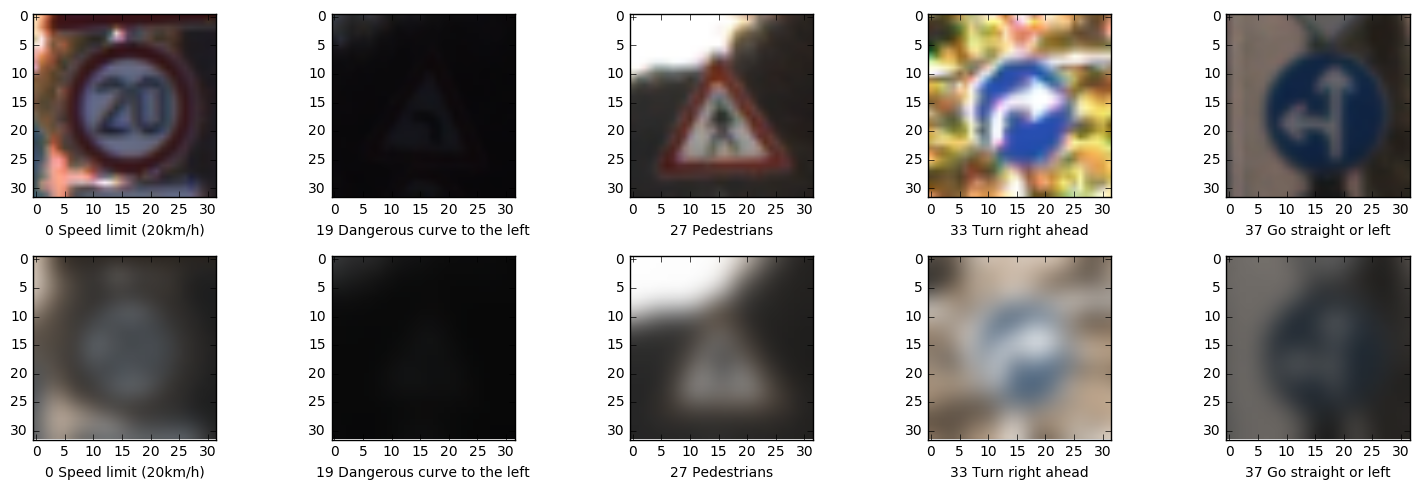

In [17]:
# add blurring effect
f, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
for i in range(5):
    ax[0,i].imshow(X_check[i])
    ax[0,i].set_xlabel(str(y_check[i])+' '+SignsName.loc[SignsName.index[y_check[i]],'SignName'])
    # applying gaussian filter in order to add difficulties
    X_check[i] = ndimage.gaussian_filter(X_check[i], sigma=2, mode='nearest')
    ax[1,i].imshow(X_check[i])
    ax[1,i].set_xlabel(str(y_check[i])+' '+SignsName.loc[SignsName.index[y_check[i]],'SignName'])
f.tight_layout()

**Answer:**
There are the following features of the taken pictures, which may create difficulties for classification:
1. Count of classes of these pictures is small in train set. It means that during forward and back propagation net model rarely met them. So, we can assume that weights and biases were not appropriately adjusted for them.
2. I applied blurring by using gaussian filter. At least, for human eyes, classification becomes complicated. Applying this filter is analogy to foggy conditions, which make sense to test images.
The first feature doesn't add, at least, serious difficulties, because pictures with the same qualities were in train set.

The second feature significantly decreases contrast and brightness of the pictures. Elements of pictures intermix with each other and their borders become less recognizable, for example, in the first picture it's complicated to recognize number 20, in the second - what element is inside of triangle form. The model didn't meet pictures with this feature during training stage, so right now its architecture and parameters give other outputs (probabilities), say, the net makes distribution of output probabilities bimodal and more. Overall, the feature leads to effect that the trained model may define less classes, because during forward propagation the net can recognize less distinguishable elements.

In [18]:
# normalizing input test data
X_check_norm = X_check/128-1

# calculating accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_check_norm, y_check, 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Model Accuracy is 60% (3 of 5 pictures was correctly classified). It is worse than validation 98,8% and test 94,9% accuracy. Possible reason for that:
+ applied gaussian filter (it looks like a fog). Network did not meet this sort of pictures during training stage, so it is anticipated result. Nevertheless in order to meet real world situation we can finetune or retraine model by giving images in a new weather conditions (like fog for example).

The result 60% is mostly explained by training set, not the net architecture or techniques for net learning.

In [19]:
# visualizing the softmax probabilities
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    out = sess.run(logits, feed_dict={x:X_check_norm, keep_prob:1.0})
    prob = sess.run(tf.nn.softmax(out))
    print(prob)

[[  3.54670137e-02   8.64810467e-01   8.49539321e-03   2.90272525e-03
    1.42682425e-03   2.54782569e-03   7.00056320e-04   1.26714745e-04
    3.32495500e-03   9.91233901e-05   2.34286858e-06   5.87288851e-05
    4.44093421e-05   1.73995169e-04   2.30708811e-05   6.23133907e-04
    9.21490937e-06   1.38884265e-04   6.85026826e-05   2.03808736e-06
    6.21054496e-04   1.10538531e-05   3.47661597e-07   7.10679569e-06
    2.01357102e-06   2.61321638e-05   1.89599323e-05   1.16886042e-06
    1.96217061e-05   3.20198569e-06   2.67095402e-06   6.08571980e-04
    7.39513040e-02   6.64837135e-05   1.96398087e-05   2.25347667e-05
    8.81560663e-06   3.49017319e-05   3.57183482e-04   2.90480602e-06
    3.13728815e-03   2.95145783e-05   2.06306777e-06]
 [  1.19897013e-04   5.39827254e-03   7.75065050e-02   3.04840803e-02
    1.64201502e-02   1.50381755e-02   8.03413132e-05   1.08468225e-02
    2.52035826e-01   1.81107651e-02   2.71599041e-03   1.84079714e-03
    4.70847590e-04   7.00593553e-03 

In [20]:
#checking that sum probabiliries is 1
for i in range(5):
    print(np.sum(prob[i]))

1.0
1.0
1.0
1.0
1.0


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
# calculating top 5 probabilities
with tf.Session() as sess:
    out = sess.run(tf.nn.top_k(tf.constant(prob), k=5))
    print(out)

TopKV2(values=array([[  8.64810467e-01,   7.39513040e-02,   3.54670137e-02,
          8.49539321e-03,   3.32495500e-03],
       [  2.52035826e-01,   2.12631166e-01,   8.59807283e-02,
          7.75065050e-02,   5.48597872e-02],
       [  7.90416539e-01,   1.75537422e-01,   2.39903461e-02,
          2.86894105e-03,   2.52846326e-03],
       [  9.93060827e-01,   6.71152398e-03,   2.15010456e-04,
          4.89426657e-06,   4.70043142e-06],
       [  9.98559058e-01,   5.86352544e-04,   5.42557216e-04,
          2.16417509e-04,   4.24510581e-05]], dtype=float32), indices=array([[ 1, 32,  0,  2,  8],
       [ 8, 39, 15,  2, 26],
       [27, 26, 18, 28, 20],
       [33, 39, 35, 34, 37],
       [37, 35, 39,  9, 13]]))


**Answer:**

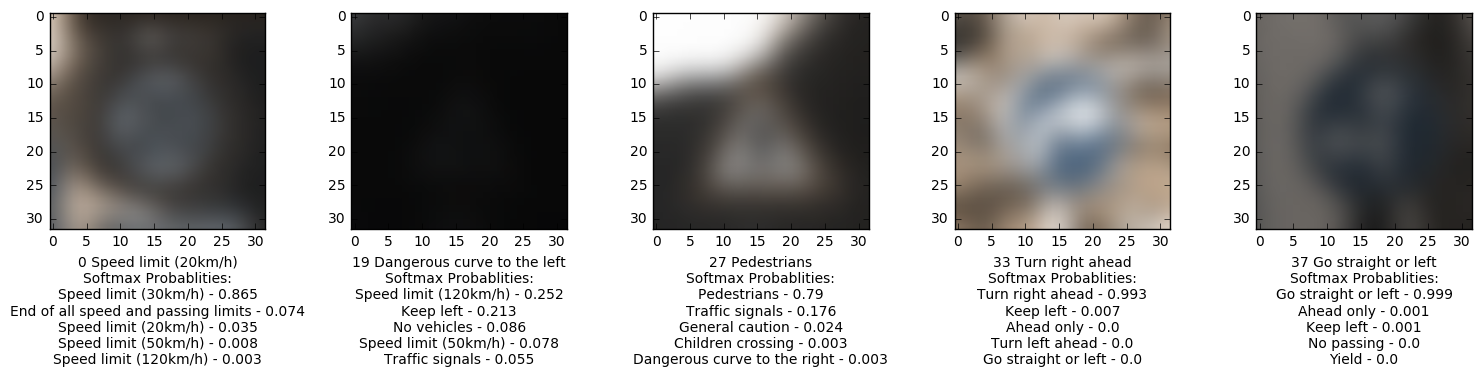

In [22]:
#visualizing indecis with the highest probabiities under pictures
f, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))
for i in range(5):
    ax[i].imshow(X_check[i])
    ax[i].set_xlabel(str(y_check[i])+' '+SignsName.loc[SignsName.index[y_check[i]],'SignName'] 
                     +'\n'+'Softmax Probablities:'
                     +'\n'+str(SignsName.loc[SignsName.index[out.indices[i][0]],'SignName'])+' - '+str(round(out.values[i][0],3))
                     +'\n'+str(SignsName.loc[SignsName.index[out.indices[i][1]],'SignName'])+' - '+str(round(out.values[i][1],3))
                     +'\n'+str(SignsName.loc[SignsName.index[out.indices[i][2]],'SignName'])+' - '+str(round(out.values[i][2],3))
                     +'\n'+str(SignsName.loc[SignsName.index[out.indices[i][3]],'SignName'])+' - '+str(round(out.values[i][3],3))
                     +'\n'+str(SignsName.loc[SignsName.index[out.indices[i][4]],'SignName'])+' - '+str(round(out.values[i][4],3)))
f.tight_layout()

The three images were correctly classified: 3, 4, 5. For the last two the highest softmax probabilities are more than 0.95%. It is definitely good value to trust.

The net model with certainty 86.5% 'thinks' the first image (Speed limit 20) is 'Speed limit 30', but at the same time, the model says:
+ with certainty 7.4% this is 'End of all speed and passing limits',
+ 3.5% - Speed limit 20,
+ 0.8% - Speed limit 50.

We can see the model 'thinks' a sign belongs the group 'Speed limit X km/h'. I believe the result is close to a human performance. 

The second picture 'Dangerous curve to the left' was classified as a 'Speed limit 120' with 25.2% certainty. It is complicated to name class of the sign (I can see triangle form and some lines inside), and there is no one big value for softmax probabilities. It proves this is difficult case. 

Overall, it is new portion pictures, which the net model have not seen before, so the accuracy 60% is not bad.

### Classification New sign and No sign

We have tne model which can predict 43 classes, but what about cases when we put in the model a traffic sign belongs new unknown class or no sign. The net says which classes new pictures are similar to. But it's a little bit incorrect.

In [65]:
from scipy import stats
# define function for clasification
size = tf.constant([32,32])
def traffic_sign_class(input_image):
    resized_image = []
    with tf.Session() as sess:
        resized_image.append(sess.run(tf.image.resize_images(input_image, size, method=1, align_corners=False)))
        resized_image = np.array(resized_image)
        resized_image_norm = resized_image/128-1
        saver.restore(sess, tf.train.latest_checkpoint('.'))  
        out = sess.run(logits, feed_dict={x:resized_image_norm, keep_prob:1.0})
        prob = sess.run(tf.nn.softmax(out))
        out_top1 = sess.run(tf.nn.top_k(tf.constant(prob), k=1))
        
        X1 = np.copy(X_test[np.where(y_test==out_top1.indices[0][0])[0][0]])/128-1
        X2 = np.copy(X_test[np.where(y_test==out_top1.indices[0][0])[0][1]])/128-1
        diff1 = (X2-X1).flatten()
        diff2 = (X2-(resized_image/128-1)).flatten()
        if (stats.ks_2samp(diff1, diff2).pvalue <(1e-100)):
            output = 'There is no traffic sign, or it is a new traffic sign'
        else:
            output = (out_top1.indices[0][0], SignsName.loc[SignsName.index[out_top1.indices[0][0]],'SignName'])
        
    return output

The function above is simple metrics to define a given picture is a new class of sign (no sign) or this is sign belonging to given classes. It calculates class with the highest probability, then compares distributions between 1) difference two examples of class and 2) difference between example and given picture. Both distributions are similar to uniform. We calculate p-value and compare with a threshold.

Of course, this algorithm makes no pretence of being good, but it is only attempt. Here are the results:

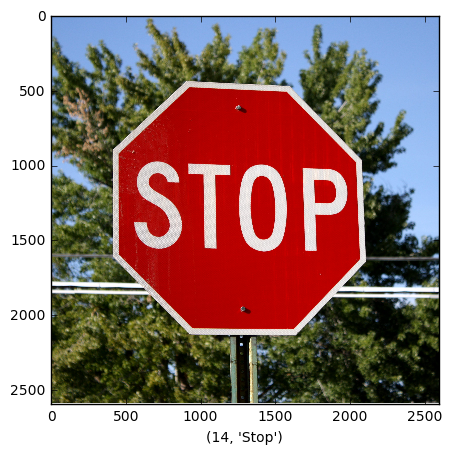

In [66]:
image = ndimage.imread('stop_sign.jpg')
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)
ax.set_xlabel(traffic_sign_class(image))
ax.grid(False)

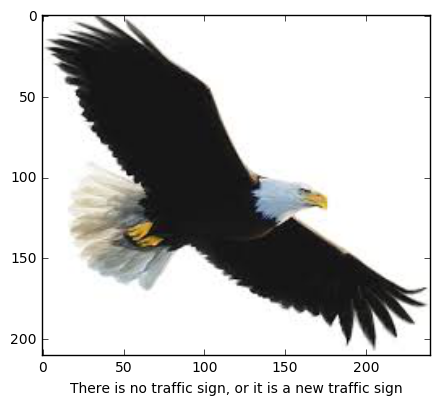

In [67]:
image = ndimage.imread('eagl.jpeg')
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)
ax.set_xlabel(traffic_sign_class(image))
ax.grid(False)

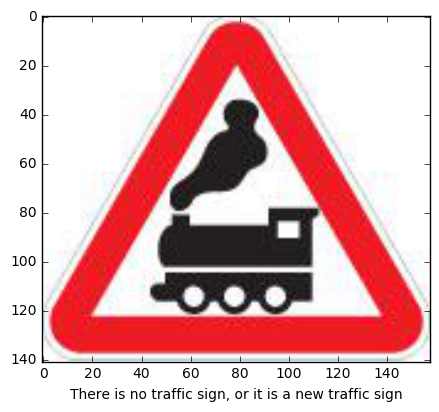

In [68]:
image = ndimage.imread('train.jpg')
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)
ax.set_xlabel(traffic_sign_class(image))
ax.grid(False)

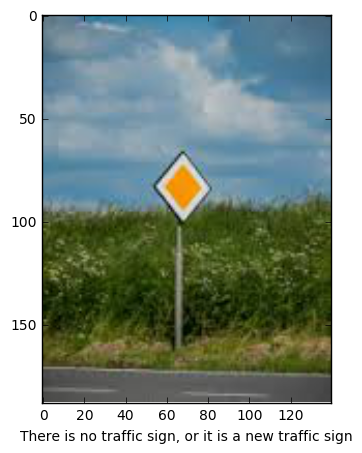

In [69]:
image = ndimage.imread('priority_road.jpeg')
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)
ax.set_xlabel(traffic_sign_class(image))
ax.grid(False)